 # Fake Job Predictor

--------------------------------------------------------------------------------
#### Problem Statement
--------------------------------------------------------------------------------
This project aims to create a classifier that will have the capability to identify fake and real jobs. The final result is evaluated based on two different models. Since the data provided has numeric and text features, one model will be used on the text data and another on numeric data. The final output will be a combination of the two. The final model will take in any relevant job posting data and produce a final result determining whether the job is real or not.

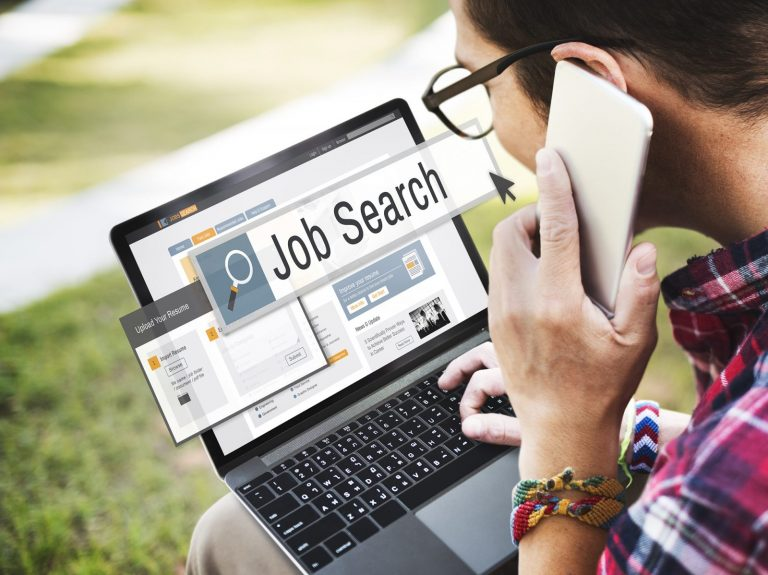

## Real / Fake Job Posting Prediction

Import Libraries

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

##Upload the file

In [ ]:
data=pd.read_csv("/content/fake_job_postings.csv")

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


check :👍

1-shape

2-Data type

3-Null value

4-unique_values

5-EDA


In [ ]:
data.shape

(17880, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data['job_id'].is_unique


True

Set indexing staring from job_id

In [ ]:
clean_data = data.set_index('job_id')
clean_data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
clean_data['department'].unique()

array(['Marketing', 'Success', nan, ..., 'Admin - Clerical',
       'Administrative Dept', 'Hospitality'], dtype=object)

In [ ]:
clean_data['department'].value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

In [ ]:
clean_data.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

check salary range

In [ ]:
print(clean_data['salary_range'].max())

TypeError: ignored

In [ ]:
salary_range = clean_data['salary_range']
salary_range

job_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
17876    NaN
17877    NaN
17878    NaN
17879    NaN
17880    NaN
Name: salary_range, Length: 17880, dtype: object

In [ ]:
salary_range.dropna()

job_id
7          20000-28000
11       100000-120000
16       120000-150000
24       100000-120000
32         50000-65000
             ...      
17845              0-0
17850     80000-100000
17866      18000-20000
17868      18000-19000
17875     80000-100000
Name: salary_range, Length: 2868, dtype: object

In [ ]:
clean_data['min_salary'] = 0
clean_data['max_salary'] = 0

In [ ]:
clean_data['salary_range'] = clean_data['salary_range'].str.split('-')

In [ ]:
for i in range(len(clean_data)):
    try:
        value = clean_data['salary_range'].iloc[i]
        if type(value) is list:
            clean_data['min_salary'].iloc[i] = int(value[0])
            clean_data['max_salary'].iloc[i] = int(value[1])
            clean_data['salary_range'].iloc[i] = int(value[1]) - int(value[0])
        else:
            clean_data['salary_range'].iloc[i] = 0
            
    except ValueError:
        clean_data['salary_range'].iloc[i] = 0
    except IndexError:
        clean_data['salary_range'].iloc[i] = 0
clean_data['salary_range'] = clean_data['salary_range'].astype(str).astype(int)

In [ ]:
clean_data[clean_data['salary_range']!=0].head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary
job_id,,,,,,,,,,,,,,,,,,,
7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,8000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000,28000
11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",NaN,20000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,100000,120000
16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,30000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,120000,150000


In [ ]:
clean_data.drop(['min_salary', 'max_salary'], axis=1, inplace=True)

In [ ]:
clean_data.head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
title_null = sum(clean_data['title'].isnull())
title_null

0

Let's see how many nulls exsist in title, location, company_profile, description, requirements and benefits.

In [ ]:
title_null = sum(clean_data['title'].isnull())
location_null = sum(clean_data['location'].isnull())
company_profile_null = sum(clean_data['company_profile'].isnull())
description_null = sum(clean_data['description'].isnull())
requirements_null = sum(clean_data['requirements'].isnull())
benefits_null = sum(clean_data['benefits'].isnull())
print(title_null, location_null, company_profile_null, description_null, requirements_null, benefits_null)

0 346 3308 1 2695 7210


Let's just fill these in with empty strings

In [ ]:
 clean_data['location'] = clean_data['location'].fillna("")
clean_data['company_profile'] = clean_data['company_profile'].fillna("")
clean_data['description'] = clean_data['description'].fillna("")
clean_data['requirements'] = clean_data['requirements'].fillna("")
clean_data['benefits'] = clean_data['benefits'].fillna("")

In [ ]:
title_null = sum(clean_data['title'].isnull())
location_null = sum(clean_data['location'].isnull())
company_profile_null = sum(clean_data['company_profile'].isnull())
description_null = sum(clean_data['description'].isnull())
requirements_null = sum(clean_data['requirements'].isnull())
benefits_null = sum(clean_data['benefits'].isnull())
print(title_null, location_null, company_profile_null, description_null, requirements_null, benefits_null)

0 0 0 0 0 0


In [ ]:
clean_data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
clean_data['text'] = clean_data[['title', 'company_profile', 'description', 
                                 'requirements', 'benefits']].apply(' - '.join, axis=1)

In [ ]:
clean_data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
job_id,,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0,"Marketing Intern - We're Food52, and we've cre..."
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production - 90...
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Commissioning Machinery Assistant (CMA) - Valo...
4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC - Our passio...
5,Bill Review Manager,"US, FL, Fort Worth",NaN,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager - SpotSource Solutions LLC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,Account Director - Distribution - Vend is loo...
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,Payroll Accountant - WebLinc is the e-commerce...
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,Project Cost Control Staff Engineer - Cost Con...


In [ ]:
clean_data = clean_data.drop(['title', 'location', 'company_profile', 'description', 
                              'requirements', 'benefits'], axis=1)

In [ ]:
clean_data = clean_data.drop(['department', 'industry'], axis=1)

In [ ]:
clean_data.head()

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,,
1,0,0,1,0,Other,Internship,NaN,Marketing,0,"Marketing Intern - We're Food52, and we've cre..."
2,0,0,1,0,Full-time,Not Applicable,NaN,Customer Service,0,Customer Service - Cloud Video Production - 90...
3,0,0,1,0,NaN,NaN,NaN,NaN,0,Commissioning Machinery Assistant (CMA) - Valo...
4,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,Account Executive - Washington DC - Our passio...
5,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,Bill Review Manager - SpotSource Solutions LLC...


Cleaning Text Data

**Remove Stopwords, Punctation and Special Characters**

In [ ]:
clean_data['text'] = clean_data['text'].str.lower()
stop = stopwords.words('english')
clean_data['text'] = clean_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_data['text'] = clean_data['text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
clean_data['text'] = clean_data['text'].str.replace(r'[\'-]', '')
clean_data['text'] = clean_data['text'].str.replace(r'[\'\",()*&^%$#@!~`+=|/<>?{}\[\]\/\\:;\_]]', ' ') # remove punctuation
clean_data['text'] = clean_data['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('url')]))
clean_data['text'] = clean_data['text'].apply(lambda x: ' '.join([word for word in x.split(' ') if len(word)<25]))
clean_data['text'] = clean_data['text'].map(lambda x: re.sub(r'\W+', ' ', x))
clean_data['text'] = clean_data['text'].str.replace(r'[0-9]', '') # get rid of numbers
clean_data['text'] = clean_data['text'].str.replace(r'[^a-z]', ' ') # get rid of any non english characters

In [ ]:
#Apply Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in word_tokenize(text)]

In [ ]:
clean_data['text'] = clean_data['text'].apply(lemmatize_text)

In [ ]:
clean_data['text'] = [' '.join(map(str, l)) for l in clean_data['text']]

In [ ]:
clean_data.head(3)

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,,
1,0,0,1,0,Other,Internship,NaN,Marketing,0,marketing intern were food weve created ground...
2,0,0,1,0,Full-time,Not Applicable,NaN,Customer Service,0,customer service cloud video production second...
3,0,0,1,0,NaN,NaN,NaN,NaN,0,commissioning machinery assistant cma valor se...


In [ ]:
clean_data.to_csv('Data')

In [ ]:
from google.colab import files
files.download('Data.csv')

FileNotFoundError: ignored